# Practical 4 - Plotting 

We have already explored how to compute error metrics for model evaluation. Today, we are going to focus on the use of visual aids (plots) to inspect how our models are performing. We will create both $\it{line plots}$ and $\it{scatter plots}$ -- both formats should be familiar to you from earlier in the course. 

Compared to earlier sessions in which we have generated plots, this time we will consider a little more of the recipe for making such figures, so that you can design plots of your own in the future -- rather than relying on copy/pasting the code I have been providing to you. 

Let's begin by importing the relevant modules for today's session

In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

Next, import the Global Forecasting System (GFS) data discussed in class. Note that you need to have downloaded this from from Learn -- and you must save the file in an appropriate place (indicated by "fin", below). 

You should be comfortable using the read_csv method from Pandas module. Ask if you are unsure what any of the code below is doing. 

In [16]:
fin="C:/Users/gytm3/OneDrive - Loughborough University/Teaching/GYP035/201920/GFS_student.csv"
gfs=pd.read_csv(fin,parse_dates=["TIMESTAMP"],index_col=0)
gfs.head(10)

,2t,q,10u,10v,dswrf,dlwrf
TIMESTAMP,,,,,,
2016-04-08,6.325,4.955,2.202,0.100,220.75,268.50
2016-04-09,6.175,4.892,2.470,1.867,179.50,309.00
2016-04-10,5.200,4.007,-4.055,1.720,228.75,260.75
2016-04-11,9.525,6.415,-7.243,-0.163,174.25,319.75
2016-04-12,9.400,6.005,2.335,1.722,163.00,309.50
2016-04-13,8.725,5.212,1.355,0.325,246.75,278.25
2016-04-14,8.225,5.938,-2.960,-0.998,199.00,291.25
2016-04-15,7.200,5.795,-1.915,-2.478,140.75,319.00
2016-04-16,4.100,4.602,1.755,-5.730,160.75,302.75


And also load the data observed at the campus weather station (noting that we also resample and summarise the data into a daily mean):

In [17]:
fin="C:/Users/gytm3/OneDrive - Loughborough University/Teaching/GYP035/201920/Campus_Met_Data_Daily.csv"
obs=pd.read_csv(fin,parse_dates=True,index_col=0)
obs.head(10)

,RECORD,AirTC_Avg,RH,T107_C,T107_C_2,WP_kPa,WP_kPa_2,VW_Avg,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,SlrkW_Avg,SlrMJ_Tot,NR_Wm2_Avg,CNR_Wm2_Avg,Rain_mm_Tot,BP_mbar_Avg
TIMESTAMP,,,,,,,,,,,,,,,,,
2016-04-08,95.5,9.284,78.484,-124.667,-136.122,-3.693,-3.692,NaN,1.172,214.574,30.691,0.114,1.030,50.623,50.623,0.0,1003.010
2016-04-09,191.5,7.281,79.212,-130.942,-130.374,-3.694,-3.696,NaN,1.355,226.177,34.652,0.118,1.064,41.475,41.474,0.0,994.594
2016-04-10,287.5,7.003,72.708,-110.323,-116.110,-3.694,-3.694,NaN,1.763,118.349,26.402,0.167,1.507,69.247,69.266,0.0,1000.677
2016-04-11,383.5,10.468,83.865,-122.585,-136.091,-3.696,-3.697,NaN,2.171,63.714,24.319,0.112,1.007,49.099,49.184,0.0,1000.250
2016-04-12,479.5,10.059,84.848,-122.554,-133.011,-3.693,-3.694,NaN,0.971,241.215,32.683,0.078,0.702,29.172,29.172,0.0,998.698
2016-04-13,575.5,10.685,73.719,-108.995,-120.703,-3.696,-3.697,NaN,0.865,212.739,44.977,0.199,1.792,88.577,88.577,0.0,1000.927
2016-04-14,671.5,9.619,84.003,-117.427,-118.176,-3.693,-3.692,NaN,1.731,68.041,28.711,0.116,1.047,53.505,53.508,0.0,1002.906
2016-04-15,767.5,6.992,91.731,-119.931,-118.112,NaN,NaN,NaN,1.543,104.314,25.046,0.035,0.314,1.409,1.408,0.0,995.135
2016-04-16,863.5,4.890,78.953,-116.614,-132.361,-3.696,-3.685,NaN,1.782,279.082,31.969,0.152,1.369,61.768,61.780,0.0,997.510


## Scatter Plot

The first type of plot we will consider is the bivariate scatter. Although hopefully familiar to you from the lecture, it's worth considering in some detail what's actually going on -- given its ubiquity in evaluating model performance. 

A scatter plot is comprised of markers/points whose positions are determined by pairs of x,y coordinates. The x coordinate gives the distance moved along the horizontal axis, and the y-coordinate tells us the distance to move up the vertical axis. These x and y coordinates are given by the variables we want to compare: all values from one variable make up the x-coordinates, and all values from the other constitute the y-coordinates. Note that we must not jumble/mix the rows when arranging our data for plotting like this: we are interested in the $\it{pairs}$, so must leave each x value matched with the corresponding y. 

When we use a scatter plot to compare modelled (in this case, y) and observed (in this case, x) series, we would like all of our points to fall as close as possible to the 1:1 line -- that is, where y=x. Why? Because if the points fall along this line it means, by definition, that the model is generating results that are $\it{identical}$ to those observed!

Let's get our first view of the GFS model performance. Run the code below to generate the scatter plot. 

(-5, 26)

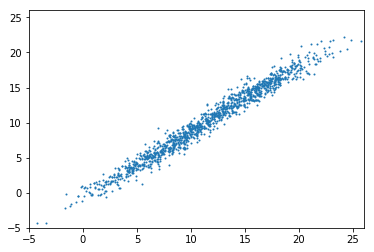

In [18]:
fig,ax=plt.subplots(1,1)
ax.scatter(obs["AirTC_Avg"],gfs["2t"],s=1)
ax.set_xlim([-5,26])
ax.set_ylim([-5,26])

## Understanding the plotting code 

Above we used the most flexible way to draw a plot, which starts with: 

fig,ax=plt.subplots(1,1)

This 'subplot' method of matplotlib.pyplot can be used to draw multiple pairs of axes (i.e. blank plots), and here we told python [with the (1,1) instruction)] that we want 1 row of blank plots and 1 column of blank plots -- i.e. a single blank plot! This syntax may seem a bit clunky but it makes adding more plots trivially easy. 

The next instruction: 

ax.scatter(obs["AirTC_Avg"],gfs["2t"],s=1)

Used the scatter method of the ax variable. The first argument to this function (in this case obs["AirTC_Avg"]) provides the x-coordinates, and the second (in this case gfs["2t"]) gives the y-coordinates. The third argument here (s=1) controls the size of the markers.

### Improving the plot

As it stands, the plot we have made is not acceptable. It has no axes labels, and we could/should make it easier to interpret by adding grid lines, and by including the reference 1:1 line. 

In the code cell below you should reproduce and improve upon our existing scatter plot. I have started this process for you by copying some code across; by adding the grid lines to the y-axis; and by including a label for the x-axis. I have also plotted the 1:1 line. Note that I do this by creating a range of numbers (from 0 to 26) using numpy's arange command, and then use the 'plot' method of ax. This plot method works the same way as 'scatter' does: it takes pairs of x and y coordinates and uses these to determine plotting position. However, the 'plot' method does not (by default) use markers; instead it joins the x-y coordinates with a line. The 'plot' method therefore is how we create a $\it{line}$ plot. Note that in this instance plot is called with the x coordinates twice! This is because we want to plot the 1:1 line is line the y-coordinates are the same as the x-coordinates -- that is y=x (so I can also use the x-coordinates to represent to y). If you don't understand this point, ask for an explanation. 

Add to/edit the code below to include the x grid lines and the y-label. I also want you to change the colour of the scatter points to black.  

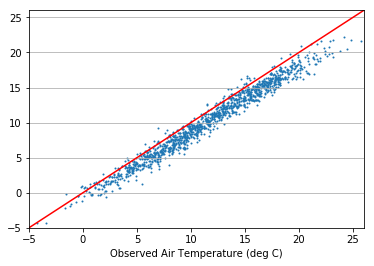

In [19]:
fig,ax=plt.subplots(1,1)
ax.scatter(obs["AirTC_Avg"],gfs["2t"],s=1)
ax.set_xlim([-5,26])
ax.set_ylim([-5,26])
ax.set_xlabel("Observed Air Temperature (deg C)")
ax.yaxis.grid()
x=np.arange(-5,27)
ax.plot(x,x,color='red')

The scatter plot provides you with a means to visually assess the correlation between the observed and predicted temperatures, but we can also compute the Pearson product-moment correlation coefficient to quantify the correlation. Remember that correlations close to -1 or +1 indicate a very strong relationship, and those closer to zero indicate a weaker relationship. Because we are assessing the performance of a forecast, we would hope for not just a *strong* correlation, but a strong *positive* one. Compute the correlation using the code below (which makes use of the 'corr' method available to variables in a pandas dataframe). 

In [20]:
r = obs["AirTC_Avg"].corr(gfs["2t"])
print("Correlation is: %.3f"%r) # Note that this way of printing is sutbly different from the method I used in 
# earlier sessions. It looks more complicated, but enables me to control the format of the number I print. 

Correlation is: 0.985


Using the terms bias and correlation, how would you describe the performance of the GFS model as shown in the scatter plot? You should discuss this with a member of staff before moving on. 



## Line Plot

Line plots of time series data are an additional means of inspecting model performance. This is the only way, for example, that you will quickly detect whether your model is lagging ahead or running behind he observations; the scatter plot is "blind to  time". 

Run the code below to plot the observed time series and the forecast from the GFS model. Note that there are a few new features introduced here that I will explain below. 

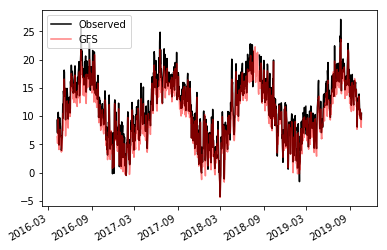

In [21]:
fig,ax=plt.subplots(1,1)
ax.plot(obs["AirTC_Avg"],color="black",label="Observed")
ax.plot(gfs["2t"],color="red",alpha=0.5,label="GFS")
ax.legend()
fig.autofmt_xdate()

The first thing to notice is that, because we have plotted a DataFrame, the plot method understands that the date is our x-coordinate, so we only need to provide the y-values (i.e. observed/forecast air temperature). 

The other additions are: 

- use of the 'label' keyword -- which we use to override the column name from the DataFrame
- use of the 'alpha' keyword -- used to set the transparency of the line
- use of 'ax.legend()' -- includes the legend in the plot (so we can see which line is which)
- use of 'fig.autofmt_xdate' -- this is a neat method belonging to the figure which tidies up the display of the dates

How did I know which keywords would change those parts of the plot? Simple - I read about these properties in the documents for the 'plot' method (of matplotlib.pyplot): https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html. 

There is one more thing you may need to do: save your figure for inclusion in a report. Edit 'fout' below and run the code to save your plot somewhere sensible: 

In [22]:
fout="C:/Users/gytm3/OneDrive - Loughborough University/Teaching/GYP035/201920/demo_fig"
fig.savefig(fout+".png",dpi=300)

You should check that your plot has been saved where you expected before moving on. 

## Your Challenge

Before the next session you should: 

- Import the climatology series generated earlier in the course ('clim' - modelled the day-of-year climatology with the sine wave)
- Create a line plot showing the observed, GFS, and clim series
- Compute error metrics ($\it{ME}$ and $\it{MAE}$) for the GFS model. What is the $\it{ME}$ telling you in this instance?
- Use your function from the last session to compute the $\it{SS}$ for the GFS model -- relative to clim (the sine wave). Is the GFS model an improvment on the climatology? In other words, is it a skillful forecast of the $\it{weather}$ -- the variability around the climatology?